## TP3 : Gradation du cancer du sein en immunohistochimie 

### Installation


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
from skimage import io, exposure, color, filters, util
import matplotlib.pyplot as plt 
import cv2 
import numpy as np
from PIL import Image
from skimage.io import imread,imshow
import pims
from skimage import morphology, segmentation, feature
from skimage.filters import  threshold_otsu
from skimage import measure
import math
from skimage.measure import label, regionprops, regionprops_table
import matplotlib.image as mpimg
from skimage.draw import ellipse

Dans notre étude, il s’agit de mesurer le ratio entre les cellules positives (exprimées en
marron sur l’image test) et celles négatives (exprimées et bleu sur l’image test) par rapport
à ce marquage. 

Text(0.5, 1.0, 'Image initial')

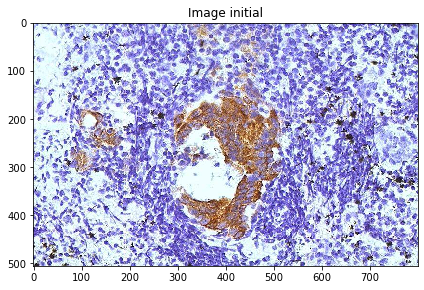

In [4]:
#Lecture de l'image
image= io.imread('ihc.png') 
io.imshow('ihc.png')
plt.title('Image initial')

Text(0.5, 1.0, 'Histogramme des cellules')

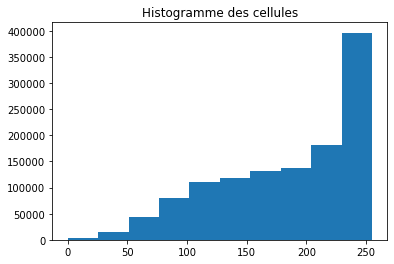

In [5]:
#Histogramme de l'image
fig=image.ravel()
plt.hist(fig)
plt.title('Histogramme des cellules')

###  Segmentation de l'image en RGB

In [7]:
b, g, r= cv2.split(image)


### Obtention des noyaux négatives de l'image

Text(0.5, 1.0, "Noyaux négatifs dans l'image")

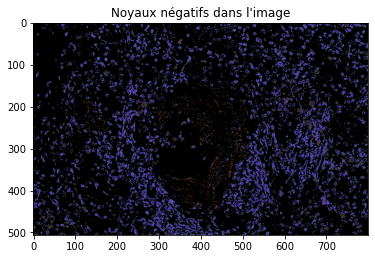

In [82]:
idbn_neg=np.where(b>110)
test_neg=np.copy(image)
test_neg[idbn_neg]=0
plt.imshow(test_neg)
plt.title("Noyaux négatifs dans l'image")

### Obtention des noyaux positives

Text(0.5, 1.0, "Noyaux positifs dans l'image")

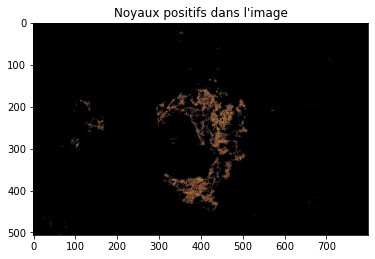

In [83]:
test_pos=np.copy(image)
idrn_pos=np.where(r>100)
test_pos[idrn_pos]=0
idbp_pos=np.where(b<100)
test_pos[idbp_pos]=0
plt.figure()
plt.imshow(test_pos)
plt.title("Noyaux positifs dans l'image")

In [88]:
#Parcourir les lignes et colonnes afin de déterminer le nombre de noyaux positifs
n=0
test_pos_lin=test_pos[...,1]
sizel=np.size(image,1)
sizec=np.size(image,0)
for i in range(sizec):
    for j in range(sizel):
        if test_pos_lin[i,j]!=0:
            n+=1
print("Nombres de noyaux positifs:",n) 

Nombres de noyaux positifs: 11681


In [89]:
#Parcourir les lignes et colonnes afin de déterminer le nombre de noyaux positifs
m=0
test_neg_lin=test_neg[...,1]
for i in range(sizec):
    for j in range(sizel):
        if test_neg_lin[i,j]!=0:
            m+=1
print("Nombres de noyaux negatifs:",m) 

Nombres de noyaux negatifs: 66977


In [92]:
#Ratio entre les noyaux positifs et l'ensemble des noyaux
print("le ratio vaut",n/(n+m)*100,"%", end="")

le ratio vaut 14.850364870706095 %

## A présent nous allons enlever les déchets de l'image pour avoir un ratio plus précis

Text(0.5, 1.0, 'Image binarisé des noyaux positifs')

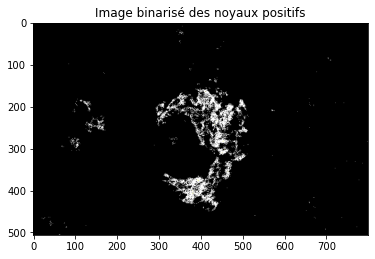

In [93]:
#Binarisation de l'image de noyaux positifs
ret,mask_pos = cv2.threshold(test_pos,0,255,cv2.THRESH_BINARY) #Fond en noir
plt.imshow(mask_pos)
plt.title("Image binarisé des noyaux positifs")

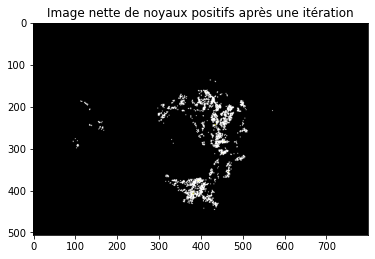

In [94]:
#Open de l'image de noyaux positifs
kernel = np.ones((2,2),np.uint8)
open_pos=cv2.morphologyEx(mask_pos, cv2.MORPH_OPEN, kernel, iterations=1)
plt.title("Image nette de noyaux positifs après une itération")
plt.imshow(open_pos,cmap="gray")
plt.show()

Text(0.5, 1.0, 'Image binarisé des noyaux négatifs')

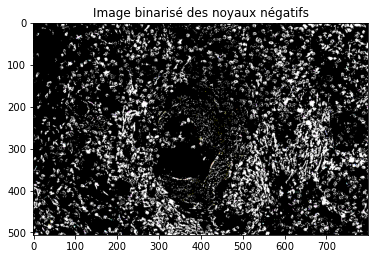

In [95]:
#Binarisation de l'image de noyaux positifs
ret,mask_neg = cv2.threshold(test_neg,0,255,cv2.THRESH_BINARY) #Fond en noir
plt.imshow(mask_neg)
plt.title("Image binarisé des noyaux négatifs")

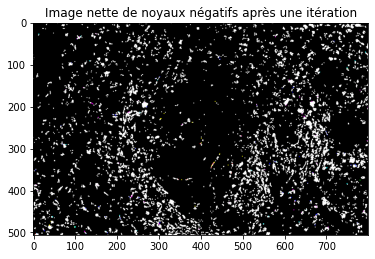

In [97]:
#Open de l'image de noyaux négatifs
kernel = np.ones((2,2),np.uint8)
open_neg=cv2.morphologyEx(mask_neg, cv2.MORPH_OPEN, kernel, iterations=1)
plt.title("Image nette de noyaux négatifs après une itération")
plt.imshow(open_neg,cmap="gray")
plt.show()

In [100]:
#Calcul du nombre de noyaux pour les images nettes
#Pour les noyaux positifs
open_pos1=open_pos[...,1]
p=0
for i in range(sizec):
    for j in range(sizel):
        if open_pos1[i,j]!=0:
            p+=1
print("Nombres de noyaux positifs:",p) 

#Pour les noyaux négatifs
open_neg1=open_neg[...,1]
t=0
for i in range(sizec):
    for j in range(sizel):
        if open_neg1[i,j]!=0:
            t+=1
print("Nombres de noyaux négatifs:",t) 

Nombres de noyaux positifs: 7573
Nombres de noyaux négatifs: 40908


In [101]:
#Ratio entre les noyaux positifs et l'ensemble des noyaux
print("le ratio vaut",p/(p+t)*100,"%", end="")

le ratio vaut 15.620552381345268 %

### Le ratio vaut dans les alentours de 15% entre les noyaux positifs et l'ensemble des noyaux.